# prerequisite
- [Register LLaMA / HuggingFace LLaMA](https://huggingface.co/blog/llama2)
    - Add LLaMA access token to *DRIVE_PATH*/hf/token.txt
- Place confouders.parquet under *DRIVE_PATH*/annotation
- Run [image2text.py](https://github.com/HireTheHero/MemesModalityEvaluation/blob/main/script/blip2/image2text.py) to get BLIP2 captions and place under *DRIVE_PATH*/annotation
- meta_result.csv should be placed under *DRIVE_PATH*/hf for reproducing meta learning analysis

- All set!

## reference
- [LLaMAForCausalLM](https://huggingface.co/blog/how-to-generate)
- [pipeline](https://huggingface.co/blog/llama2)

# init

## google drive

In [1]:
# mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# variables
# token_path = "/content/drive/MyDrive/vilio/token.txt"
hf_token_path = "/content/drive/MyDrive/hf/token.txt"

In [3]:
class TokenNotLoadedException(Exception):
    pass
def load_token(path):
    token = None
    with open(path, "r") as f:
        token = f.readline()
    if token is not None:
        print("Loaded.\nNote that the verification for actual token is not implemented for security reason. You're on your own for that.")
    else:
        raise TokenNotLoadedException("Check your token and/or path")
    return token

In [4]:
# token = load_token(token_path)
hf_token = load_token(hf_token_path)

Loaded.
Note that the verification for actual token is not implemented for security reason. You're on your own for that.


## env setup

In [5]:
%%writefile requirements.txt
accelerate==0.21.0
einops==0.6.0
sentencepiece==0.1.99
transformers==4.31.0
xformers==0.0.20
optuna==3.3.0

Writing requirements.txt


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00


In [7]:
!huggingface-cli login --token=$hf_token

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## github

In [ ]:
!git clone https://github.com/fedebotu/clone-anonymous-github
!cd clone-anonymous-github; pip install -r requirements.txt

Cloning into 'clone-anonymous-github'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 144 (delta 65), reused 103 (delta 37), pack-reused 0
Receiving objects: 100% (144/144), 151.72 KiB | 11.67 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
# SCRIPT_ROOT = "/content"
# URL = "https://anonymous.4open.science/r/MemesModalityEvaluation-2540"
SCRIPT_PATH = "/content/MemesModalityEvaluation-2540"

In [ ]:
!rm -rf $SCRIPT_PATH

In [ ]:
!cd clone-anonymous-github; python src/download.py \
    --url https://anonymous.4open.science/r/MemesModalityEvaluation-2540 \
    --save_dir /content

Cloning project:MemesModalityEvaluation-2540
Downloaded: /content/MemesModalityEvaluation-2540/.gitignore
Downloaded: /content/MemesModalityEvaluation-2540/llm_requirements.txt
Downloaded: /content/MemesModalityEvaluation-2540/notebook/ReadMe.md
Downloaded: /content/MemesModalityEvaluation-2540/data/confounders.parquet
Downloaded: /content/MemesModalityEvaluation-2540/data/hm_captions.parquet
Downloaded: /content/MemesModalityEvaluation-2540/README.md
Downloaded: /content/MemesModalityEvaluation-2540/notebook/vilio_gradient.ipynb
Downloaded: /content/MemesModalityEvaluation-2540/script/attattr/ReadMe.md
Downloaded: /content/MemesModalityEvaluation-2540/notebook/benign_confounder.ipynb
Downloaded: /content/MemesModalityEvaluation-2540/script/attattr/attattr.py
Downloaded: /content/MemesModalityEvaluation-2540/notebook/hf_llama2.ipynb
Downloaded: /content/MemesModalityEvaluation-2540/script/blip2/__init__.py
Downloaded: /content/MemesModalityEvaluation-2540/data/meta_result.csv
Downloade

In [ ]:
!cd $SCRIPT_PATH; bash shell/hf_overwrite_scripts.sh

## modules and variables

In [ ]:
import os
import shutil
import time

from IPython.display import clear_output
import numpy as np
import pandas as pd
from PIL import Image
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
import transformers

In [ ]:
MDOEL = "meta-llama/Llama-2-13b-chat-hf"
LARGE = "meta-llama/Llama-2-70b-chat-hf"

In [ ]:
DRIVE_PATH = "/content/drive/MyDrive"
DATA_DIR = "/content/hm"
PROMPT_DIR = "/content/prompts"
RESULT_DIR = "/content/results"
CONFIG_DIR = "/content/MemesModalityEvaluation/script/llama/hf"
SAVE_DIR_FIN = f"{DRIVE_PATH}/hf"
IMAGE_DIR = f"{DATA_DIR}/hateful_memes/img"

## load data

In [ ]:
!mkdir $DATA_DIR

In [ ]:
# blip2 captions / confounders
!cp $DRIVE_PATH/annotation/confounders.parquet $DATA_DIR
!cp $DRIVE_PATH/annotation/hm_captions.parquet $DATA_DIR

In [ ]:
%%capture
# hateful memes from MyDrive
!unzip $DRIVE_PATH/vilio/hateful_memes.zip -d $DATA_DIR

# run scripts

In [ ]:
# data preparation
!rm -rf $PROMPT_DIR
!mkdir $PROMPT_DIR
!python $SCRIPT_PATH/script/llama/prompt_extraction.py \
    --caption_dir $DATA_DIR \
    --meme_dir $DATA_DIR/hateful_memes \
    --conf_dir $DATA_DIR \
    --save_dir $PROMPT_DIR

2023-08-03 00:18:58,639 utils:278 [INFO]: Loaded inputs with length 921
2023-08-03 00:18:58,645 utils:284 [INFO]: Generated prompt source with length 921
2023-08-03 00:18:59,938 utils:287 [INFO]: All process complete w/ 1.6628904342651367 seconds


In [ ]:
# experiment
!rm -rf $RESULT_DIR
!mkdir $RESULT_DIR
!python $SCRIPT_PATH/script/llama/hf/few_shot_generation.py \
    --save_path $RESULT_DIR \
    --prompts_path $PROMPT_DIR \
    --config_path $CONFIG_DIR \
    --max_seq_len 2000

2023-08-02 15:45:13.194092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading checkpoint shards: 100% 3/3 [00:07<00:00,  2.59s/it]
2023-08-02 15:45:27,153 utils:173 [INFO]: Experiment #0 for image_id 19536_1_pos_max_2 started
2023-08-02 15:45:27,156 utils:179 [INFO]: 3 prompts loaded
2023-08-02 15:46:15,348 utils:183 [INFO]: Prompting finished
2023-08-02 15:46:15,414 utils:192 [INFO]: Result saved
2023-08-02 15:49:56,579 utils:173 [INFO]: Experiment #10 for image_id 05126_1_pos_max_2 started
2023-08-02 15:49:56,583 utils:179 [INFO]: 4 prompts loaded
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
2023-08-02 15:50:35,467 utils:183 [INFO]: Prompting finished
2023-08-02 15:50:35,591 utils:192 [INFO]: Result saved
2023-08-02 15:54:25,001 utils:173 [INFO]: Experiment #20 f

In [ ]:
# collect result
!python $SCRIPT_PATH/script/llama/hf/result_collection.py \
    --result_path $RESULT_DIR \
    --prompt_path $PROMPT_DIR \
    --save_path $SAVE_DIR_FIN

2023-08-02 16:27:53,409 utils:47 [INFO]: Loaded 97 results
2023-08-02 16:27:53,412 utils:69 [INFO]: Extracted generated info
2023-08-02 16:27:53,449 utils:74 [INFO]: Info saved


In [ ]:
# meta-learning analysis
!rm -rf $SAVE_DIR_FIN/atts
!mkdir $SAVE_DIR_FIN/atts
!python $SCRIPT_PATH/script/llama/hf/meta_gradient.py \
    --result_path $RESULT_DIR \
    --prompt_path $PROMPT_DIR \
    --save_path $SAVE_DIR_FIN

ストリーミング出力は最後の 5000 行に切り捨てられました。
(377, 392)
▁image:▁'a▁bartender▁and▁a▁12▁yr▁old
caption
(438, 464)
▁caption:▁'bartender:▁how▁about▁a▁nice▁12▁yr▁old?▁him:▁boy▁or▁girl?',
(479, 505)
▁caption:▁'bartender:▁how▁about▁a▁nice▁12▁yr▁old?▁him:▁boy▁or▁girl?',
image
(464, 477)
▁image:▁'a▁priest▁and▁a▁bartender'<0x0A>#
(505, 520)
▁image:▁'a▁bartender▁and▁a▁12▁yr▁old
caption
(533, 559)
▁caption:▁'bartender:▁how▁about▁a▁nice▁12▁yr▁old?▁him:▁boy▁or▁girl?',
(574, 600)
▁caption:▁'bartender:▁how▁about▁a▁nice▁12▁yr▁old?▁him:▁boy▁or▁girl?',
image
(559, 572)
▁image:▁'a▁priest▁and▁a▁bartender'<0x0A>#
(600, 615)
▁image:▁'a▁bartender▁and▁a▁12▁yr▁old
caption
(57, 69)
▁caption:▁'apparently▁not▁erdogan',
(97, 125)
▁caption:▁'bitches▁be▁like▁no▁weave,▁no▁makeup,▁no▁lashes,▁no▁eyebrows',
image
(69, 95)
▁image:▁'erdogan▁-▁erdogan▁-▁erdogan▁-▁erdogan▁-▁erdogan▁-'<0x0A>#
(125, 148)
▁image:▁'gandalf,▁lord▁of▁the▁rings,▁hobbit,▁gandalf,▁lord▁of▁the
caption
(229, 241)
▁caption:▁'apparently▁not▁erdogan',
(269, 297)
▁capt

# evaluation

## check content

In [ ]:
df_result = pd.read_csv(f"{SAVE_DIR_FIN}/extracted_info.csv").sort_values(by=["image_id", "few_shot_num"], ascending=True).reset_index(drop=True)
df_result.head(10)

,image_id,prompt,generated_text,extracted_info,few_shot_num
0,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\nAll pairs are benign.\nPlease provide at lea...,0
1,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\nThe most likely hateful or sarcastic pair is...,1
2,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\n\nThe most likely hateful or sarcastic pair ...,2
3,01726_2_pos_max_2,"User: Out of image-caption pairs #0 to #2, sel...","User: Out of image-caption pairs #0 to #2, sel...",I have analyzed all three pairs and have dete...,0
4,01726_2_pos_max_2,"User: Out of image-caption pairs #0 to #2, sel...","User: Out of image-caption pairs #0 to #2, sel...",\n\nThe most likely hateful or sarcastic pair ...,1
5,01726_2_pos_max_2,"User: Out of image-caption pairs #0 to #2, sel...","User: Out of image-caption pairs #0 to #2, sel...",\n\nThe most likely hateful or sarcastic pair ...,2
6,01726_2_pos_max_2,"User: Out of image-caption pairs #0 to #2, sel...","User: Out of image-caption pairs #0 to #2, sel...",\n\nThe most likely hateful or sarcastic pair ...,3
7,02634_0_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\n* User: All pairs are benign.\n* System: All...,0
8,02634_0_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\n\nThe most likely hateful or sarcastic pair ...,1
9,02634_0_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...","User: Out of image-caption pairs #0 to #1, sel...",\n\nAll pairs are benign.\n```\n\nThe task you...,2


In [ ]:
print(len(df_result))

371


07653_1_pos_max_1
User: Out of image-caption pairs #0 to #2, select the most likely hateful or sarcastic pair, together with potential label (hateful or sarcastic). If all pairs are benign, say 'All pairs are benign'.
#0: caption: 'when you smell cake', image: 'a woman with a long nose and a smirk on her face'
#1: caption: 'when your jewish friend smells a stash of coins in public', image: 'a woman with a nose piercing - jewish friend smells a stash of coins in public'
#2: caption: 'when your jewish friend smells a stash of coins in public', image: 'a woman wearing rubber gloves and a hat'
System:

The system will use a natural language processing (NLP) model and computer vision model to analyze the text of the captions and image features, respectively. The system will use a supervised machine learning model to predict the likelihood of each image-caption pair being hateful or sarcastic. The system will also use a rule-based approach to identify potential hate speech or offensive langu

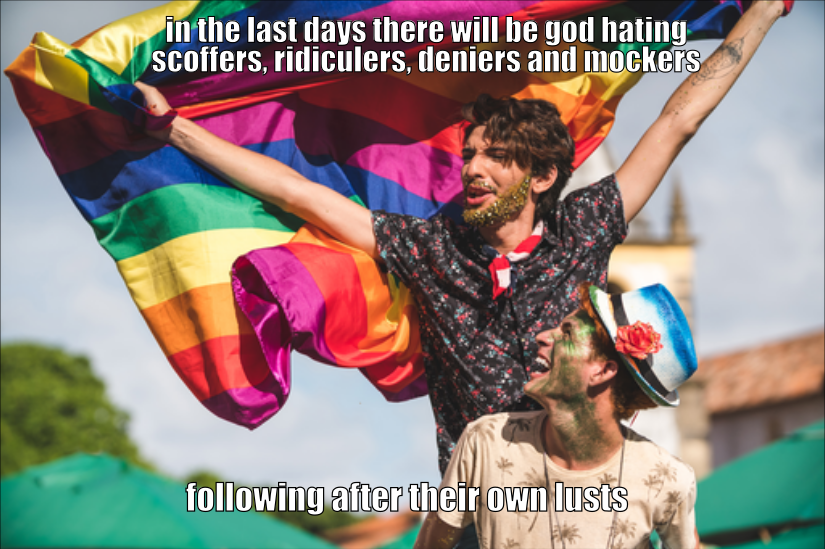

In [ ]:
image_id="07653"
image_ids = df_result["image_id"].apply(lambda x: x.split("_")[0])
df_img = df_result[image_ids==image_id].copy()
image_info = df_img["image_id"].values[0]
print(image_info)
im = Image.open(f"{IMAGE_DIR}/{image_id}.png")
print(df_result["prompt"].values[0])
print("=======================")
print(df_result["extracted_info"].values[0])
print("=======================")
display(im)

# annotation

## init

In [ ]:
# import os
# import time

# from IPython.display import clear_output
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
DRIVE_PATH = "/content/drive/MyDrive"
SAVE_DIR_FIN = f"{DRIVE_PATH}/hf"

## annotation

In [ ]:
# version,version_next="v2_10","v2_11"

In [ ]:
# df_result = pd.read_csv(f"{SAVE_DIR_FIN}/extracted_info.csv").sort_values(by=["image_id", "few_shot_num"], ascending=True).reset_index(drop=True)
# df_result.head()

In [ ]:
# n_samples = len(df_result)
# out_name = f"{SAVE_DIR_FIN}/df_meta_{version}.csv"
# cols = ["image_id", "few_shot_num", "ans_num", "is_functional", "is_formatted", "is_hateful", "is_sarcastic", "is_benign", "ground_truth", "image_info", "prompt", "extracted_info", "generated_text"]
# if os.path.isfile(out_name):
#     df_labeled = pd.read_csv(out_name)[cols]
#     is_first = 0
#     label_dict = df_labeled.to_dict("list")
#     completed = (df_labeled["image_id"].astype(str).str.zfill(5)+"_"+df_labeled["few_shot_num"].astype(str)).tolist()
# else:
#     is_first = 1
#     label_dict = {col: [] for col in cols}
#     processed_id_shots = []
# # for idx in range(n_samples):
# for idx in range(n_samples):
#     # metadata extraction
#     image_info = df_result["image_id"].values[idx]
#     few_shot_num = df_result["few_shot_num"].values[idx]
#     image_id = image_info.split("_")[0]
#     if not is_first and f"{image_id}_{few_shot_num}" in completed:
#         continue
#     print(f"Image id with info {image_info} shot #{few_shot_num}: Sample #{idx} out of {n_samples}")
#     pos_idx = image_info.split("_pos_")[0].split("_")[1:]
#     max_idx = image_info.split("_max_")[-1]
#     # text extraction
#     prompt = df_result["prompt"].values[idx].replace("\n\n\n", "")
#     extracted = df_result["extracted_info"].values[idx].replace("\n\n\n", "")
#     generated = df_result["generated_text"].values[idx].replace("\n\n\n", "")
#     print(f"Prompt: \n{prompt}")
#     print("===========================")
#     print(f"Extracted: \n{extracted}")
#     print("===========================")
#     is_functional = int(input("Is properly answered?: "))
#     if is_functional:
#         is_formatted = int(input("Is formatted like 'Most likely xx sample is...'?: "))
#     for idx2 in range(int(max_idx)+1):
#         print([idx2, pos_idx, str(idx2) in pos_idx])
#         print(f"Image-caption pair #{idx2}")
#         # basic info
#         label_dict["image_id"].append(image_id)
#         label_dict["few_shot_num"].append(few_shot_num)
#         label_dict["ans_num"].append(idx2)
#         label_dict["image_info"].append(image_info)
#         label_dict["prompt"].append(prompt)
#         label_dict["extracted_info"].append(extracted)
#         label_dict["generated_text"].append(generated)
#         # label detection
#         if str(idx2) in pos_idx:
#             label_dict["ground_truth"].append(1)
#             print("Ground-truth label should be hateful")
#         else:
#             label_dict["ground_truth"].append(0)
#             print("Ground-truth label should be benign")
#         # annotation
#         if not is_functional:
#             # auto-label 0
#             label_dict["is_functional"].append(0)
#             label_dict["is_formatted"].append(0)
#             label_dict["is_hateful"].append(0)
#             label_dict["is_sarcastic"].append(0)
#             label_dict["is_benign"].append(0)
#         else:
#             # manual annotation
#             is_hateful = int(input("Is labeled hateful?: "))
#             if not is_hateful:
#                 is_sarcastic = int(input("Is labeled sarcastic?: "))
#             else:
#                 is_sarcastic = 0
#             label_dict["is_functional"].append(is_functional)
#             label_dict["is_formatted"].append(is_formatted)
#             label_dict["is_hateful"].append(is_hateful)
#             label_dict["is_sarcastic"].append(is_sarcastic)
#             label_dict["is_benign"].append(int(not (is_hateful or is_sarcastic)))
#     time.sleep(5)
#     clear_output(True)


In [ ]:
# df_labeled = pd.DataFrame(label_dict)
# df_labeled["image_id"] = df_labeled["image_id"].astype(str).str.zfill(5)
# df_labeled.head()

In [ ]:
# out_name = f"{SAVE_DIR_FIN}/df_meta_{version_next}.csv"
# df_labeled = pd.DataFrame(label_dict)
# df_labeled.to_csv(out_name, index=False)

# explain by attention weights

## init

In [8]:
import os

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import optuna.integration.lightgbm as opt_lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import torch
import torch.nn.functional as F

%matplotlib inline

In [9]:
DRIVE_PATH = "/content/drive/MyDrive"
SAVE_DIR_FIN = f"{DRIVE_PATH}/hf"
ATTS_PATH = f"{SAVE_DIR_FIN}/atts"
# version = "v2_11"
# out_name = f"{SAVE_DIR_FIN}/df_meta_{version}.csv"
out_name = f"{SAVE_DIR_FIN}/meta_result.csv"
gt_cols = ['is_functional', 'is_formatted', 'ground_truth']
RS = 1991

## data prep

In [10]:
df_labeled = pd.read_csv(out_name)
df_labeled.head()

,image_id,few_shot_num,ans_num,is_functional,is_formatted,is_hateful,is_sarcastic,is_benign,ground_truth,image_info,prompt,extracted_info,generated_text,is_hateful_or_sarcastic,is_few_shot
0,1456,0,0,1,1,0,0,1,0,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...",\nAll pairs are benign.\nPlease provide at lea...,"User: Out of image-caption pairs #0 to #1, sel...",0,0
1,1456,0,1,1,1,0,0,1,1,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...",\nAll pairs are benign.\nPlease provide at lea...,"User: Out of image-caption pairs #0 to #1, sel...",0,0
2,1456,1,0,1,1,0,0,1,0,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...",\nThe most likely hateful or sarcastic pair is...,"User: Out of image-caption pairs #0 to #1, sel...",0,1
3,1456,1,1,1,1,0,1,0,1,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...",\nThe most likely hateful or sarcastic pair is...,"User: Out of image-caption pairs #0 to #1, sel...",1,1
4,1456,2,0,1,1,0,0,1,0,01456_1_pos_max_1,"User: Out of image-caption pairs #0 to #1, sel...",\n\nThe most likely hateful or sarcastic pair ...,"User: Out of image-caption pairs #0 to #1, sel...",0,1


In [11]:
df_labeled["is_hateful_or_sarcastic"] = (np.logical_or(df_labeled["is_hateful"], df_labeled["is_sarcastic"])).astype(int)
df_labeled["is_few_shot"] = 0
df_labeled.loc[df_labeled["few_shot_num"] != 0, "is_few_shot"] = 1

In [12]:
df_scope = df_labeled[df_labeled["few_shot_num"].isin(range(3))].reset_index(drop=False)
print(len(df_scope))

792


In [13]:
def preprocess_att(att_file, modality, mx_dim):
    att = torch.load(att_file)
    att_filled = F.pad(
        input=att,
        pad=(0,mx_dim[modality]-len(att)),
        mode='constant', value=0
    )
    return att_filled

def load_attentions(df,
                    atts_path = ATTS_PATH,
                    mx_dim = {"caption": 100, "image": 172, "cross": 212},
                    mx_shots = 2,
                    modalities = ["caption", "image", "cross"]):
    image_infos = df['image_info'].values
    att_samples = []
    for image_info in image_infos:
        att_sample = []
        image_dir = f"{atts_path}/{image_info}"
        assert os.path.isdir(image_dir)
        for modality in modalities:
            zsl_file = f"{image_dir}/{modality}_zsl.pt"
            att_zsl_filled = preprocess_att(zsl_file, modality, mx_dim)
            att_sample.append(att_zsl_filled)
            for shot in range(mx_shots-1):
                shot_file = f"{image_dir}/{modality}_delta_{shot+1}.pt"
                att_shot_filled = preprocess_att(shot_file, modality, mx_dim)
                att_sample.append(att_shot_filled)
        att_sample = torch.cat(att_sample)
        att_samples.append(att_sample)
    out = torch.stack(att_samples)
    return out


In [14]:
col = gt_cols[0]
print(col)

is_functional


In [15]:
atts = load_attentions(df_scope)
atts.shape

torch.Size([792, 968])

In [16]:
atts_arr = atts.numpy()
print(atts_arr.shape)

(792, 968)


In [17]:
y = df_scope[col].to_numpy()

In [18]:
X_train_eval, X_test, y_train_eval, y_test = train_test_split(atts_arr, y, random_state=RS, test_size=0.3)
X_train, X_eval, y_train, y_eval = train_test_split(X_train_eval, y_train_eval, random_state=RS, test_size=0.2)
print(y_train.shape, y_eval.shape, y_test.shape)

(443,) (111,) (238,)


## classification

In [19]:
params = {
    'verbose': -1,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'seed': RS,
    'deterministic':True,
    'force_row_wise':True
}

In [20]:
lgb_train = opt_lgb.Dataset(X_train, y_train)
lgb_valid = opt_lgb.Dataset(X_eval, y_eval, reference=lgb_train)
lgb_test = opt_lgb.Dataset(X_test, y_test, reference=lgb_train)
lgb_result = {}
model = opt_lgb.LightGBMTuner(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    valid_names=['Train', 'Valid'],
    num_boost_round=500,
    early_stopping_rounds=5,
    evals_result=lgb_result,
    verbosity=-1,
    verbose_eval=-1,
    optuna_seed=RS,
)

[I 2023-10-14 08:28:34,186] A new study created in memory with name: no-name-0b2d648c-2d62-460e-926d-66de8d2fe46e
/usr/local/lib/python3.10/dist-packages/optuna/integration/_lightgbm_tuner/optimize.py:453: FutureWarning: `verbosity` argument is deprecated and will be removed in the future. The removal of this feature is currently scheduled for v4.0.0, but this schedule is subject to change. Please use optuna.logging.set_verbosity() instead.
  warnings.warn(


In [21]:
model.run()
print(model.get_best_booster().params)

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.207070:  14%|#4        | 1/7 [00:02<00:16,  2.73s/it]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.158003	Valid's binary_logloss: 0.20707
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026:  29%|##8       | 2/7 [00:03<00:06,  1.34s/it]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026:  43%|####2     | 3/7 [00:03<00:03,  1.07it/s]

Early stopping, best iteration is:
[24]	Train's binary_logloss: 0.154678	Valid's binary_logloss: 0.203349
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026:  57%|#####7    | 4/7 [00:04<00:02,  1.33it/s]

Early stopping, best iteration is:
[22]	Train's binary_logloss: 0.156977	Valid's binary_logloss: 0.20366
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026:  71%|#######1  | 5/7 [00:04<00:01,  1.64it/s]

Early stopping, best iteration is:
[23]	Train's binary_logloss: 0.156186	Valid's binary_logloss: 0.20675
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026:  86%|########5 | 6/7 [00:04<00:00,  1.65it/s]

Early stopping, best iteration is:
[25]	Train's binary_logloss: 0.153742	Valid's binary_logloss: 0.202084
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.201026: 100%|##########| 7/7 [00:05<00:00,  1.32it/s]


Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.158485	Valid's binary_logloss: 0.204293


num_leaves, val_score: 0.201026:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.201026:   5%|5         | 1/20 [00:00<00:09,  2.04it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.201026:  10%|#         | 2/20 [00:00<00:07,  2.47it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.201026:  15%|#5        | 3/20 [00:01<00:09,  1.78it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026


num_leaves, val_score: 0.201026:  25%|##5       | 5/20 [00:02<00:05,  2.59it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	Train's binary_logloss: 0.193664	Valid's binary_logloss: 0.218765
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  30%|###       | 6/20 [00:02<00:04,  2.96it/s]

Early stopping, best iteration is:
[23]	Train's binary_logloss: 0.156047	Valid's binary_logloss: 0.198642
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  35%|###5      | 7/20 [00:02<00:04,  3.11it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  40%|####      | 8/20 [00:03<00:03,  3.23it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  45%|####5     | 9/20 [00:03<00:03,  3.38it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  50%|#####     | 10/20 [00:03<00:03,  3.28it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  55%|#####5    | 11/20 [00:03<00:02,  3.38it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  60%|######    | 12/20 [00:04<00:02,  3.48it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  65%|######5   | 13/20 [00:04<00:02,  3.38it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  70%|#######   | 14/20 [00:04<00:01,  3.59it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201031
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  75%|#######5  | 15/20 [00:04<00:01,  3.62it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  80%|########  | 16/20 [00:05<00:01,  3.61it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  85%|########5 | 17/20 [00:05<00:00,  3.56it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201027
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  90%|######### | 18/20 [00:05<00:00,  3.44it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642:  95%|#########5| 19/20 [00:06<00:00,  3.51it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026
Training until validation scores don't improve for 5 rounds


num_leaves, val_score: 0.198642: 100%|##########| 20/20 [00:06<00:00,  3.12it/s]


Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.159339	Valid's binary_logloss: 0.201026


bagging, val_score: 0.198642:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds


bagging, val_score: 0.198642:  10%|#         | 1/10 [00:00<00:01,  4.72it/s]

Early stopping, best iteration is:
[19]	Train's binary_logloss: 0.176053	Valid's binary_logloss: 0.209859
Training until validation scores don't improve for 5 rounds


bagging, val_score: 0.198642:  20%|##        | 2/10 [00:00<00:01,  4.32it/s]

Early stopping, best iteration is:
[24]	Train's binary_logloss: 0.15578	Valid's binary_logloss: 0.204369
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	Train's binary_logloss: 0.210371	Valid's binary_logloss: 0.240385


bagging, val_score: 0.198642:  30%|###       | 3/10 [00:00<00:01,  4.64it/s]

Training until validation scores don't improve for 5 rounds


bagging, val_score: 0.198642:  40%|####      | 4/10 [00:00<00:01,  4.39it/s]

Early stopping, best iteration is:
[30]	Train's binary_logloss: 0.151457	Valid's binary_logloss: 0.203422
Training until validation scores don't improve for 5 rounds


bagging, val_score: 0.198642:  60%|######    | 6/10 [00:01<00:00,  4.65it/s]

Early stopping, best iteration is:
[20]	Train's binary_logloss: 0.166234	Valid's binary_logloss: 0.201211
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.187202	Valid's binary_logloss: 0.235075


bagging, val_score: 0.198642:  70%|#######   | 7/10 [00:01<00:00,  4.83it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	Train's binary_logloss: 0.171381	Valid's binary_logloss: 0.205237
Training until validation scores don't improve for 5 rounds


bagging, val_score: 0.198642:  90%|######### | 9/10 [00:01<00:00,  5.09it/s]

Early stopping, best iteration is:
[16]	Train's binary_logloss: 0.186983	Valid's binary_logloss: 0.206186
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.164042	Valid's binary_logloss: 0.211671


bagging, val_score: 0.198484: 100%|##########| 10/10 [00:02<00:00,  4.67it/s]


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173295	Valid's binary_logloss: 0.198484


feature_fraction_stage2, val_score: 0.198484:  17%|#6        | 1/6 [00:00<00:01,  4.74it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.172086	Valid's binary_logloss: 0.199125
Training until validation scores don't improve for 5 rounds


feature_fraction_stage2, val_score: 0.196353:  50%|#####     | 3/6 [00:00<00:00,  5.26it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.172029	Valid's binary_logloss: 0.202236
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.174887	Valid's binary_logloss: 0.196353


feature_fraction_stage2, val_score: 0.192233:  67%|######6   | 4/6 [00:00<00:00,  5.26it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233
Training until validation scores don't improve for 5 rounds


feature_fraction_stage2, val_score: 0.192233:  83%|########3 | 5/6 [00:01<00:00,  4.81it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173003	Valid's binary_logloss: 0.198388
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.172225	Valid's binary_logloss: 0.201894


regularization_factors, val_score: 0.192233:   5%|5         | 1/20 [00:00<00:03,  4.84it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  10%|#         | 2/20 [00:00<00:03,  4.76it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  15%|#5        | 3/20 [00:00<00:03,  4.73it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  20%|##        | 4/20 [00:00<00:03,  4.52it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  25%|##5       | 5/20 [00:01<00:03,  4.39it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  30%|###       | 6/20 [00:01<00:03,  4.49it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192233:  35%|###5      | 7/20 [00:01<00:02,  4.48it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192230:  40%|####      | 8/20 [00:01<00:02,  4.47it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.19223


regularization_factors, val_score: 0.192230:  45%|####5     | 9/20 [00:02<00:02,  4.44it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192230:  50%|#####     | 10/20 [00:02<00:02,  4.13it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233
Training until validation scores don't improve for 5 rounds


regularization_factors, val_score: 0.192230:  55%|#####5    | 11/20 [00:03<00:05,  1.71it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233
Training until validation scores don't improve for 5 rounds


regularization_factors, val_score: 0.192230:  60%|######    | 12/20 [00:05<00:07,  1.03it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233


regularization_factors, val_score: 0.192230:  65%|######5   | 13/20 [00:05<00:05,  1.22it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233
Training until validation scores don't improve for 5 rounds


regularization_factors, val_score: 0.192230:  70%|#######   | 14/20 [00:06<00:04,  1.28it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.192233
Training until validation scores don't improve for 5 rounds


regularization_factors, val_score: 0.192230:  75%|#######5  | 15/20 [00:06<00:03,  1.57it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.19223


regularization_factors, val_score: 0.192230:  80%|########  | 16/20 [00:07<00:02,  1.73it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173146	Valid's binary_logloss: 0.192231


regularization_factors, val_score: 0.192230:  85%|########5 | 17/20 [00:08<00:01,  1.58it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173136	Valid's binary_logloss: 0.192242


regularization_factors, val_score: 0.192230:  90%|######### | 18/20 [00:08<00:01,  1.86it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173146	Valid's binary_logloss: 0.192231


regularization_factors, val_score: 0.192230:  95%|#########5| 19/20 [00:08<00:00,  2.23it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173137	Valid's binary_logloss: 0.192244


regularization_factors, val_score: 0.192230: 100%|##########| 20/20 [00:08<00:00,  2.23it/s]


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.173132	Valid's binary_logloss: 0.19223


min_data_in_leaf, val_score: 0.192230:  20%|##        | 1/5 [00:00<00:01,  3.86it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	Train's binary_logloss: 0.159879	Valid's binary_logloss: 0.197243


min_data_in_leaf, val_score: 0.192230:  40%|####      | 2/5 [00:00<00:00,  4.98it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	Train's binary_logloss: 0.181811	Valid's binary_logloss: 0.205643
Training until validation scores don't improve for 5 rounds


min_data_in_leaf, val_score: 0.192230:  80%|########  | 4/5 [00:00<00:00,  5.82it/s]

Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.176721	Valid's binary_logloss: 0.199742
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	Train's binary_logloss: 0.230676	Valid's binary_logloss: 0.24397


min_data_in_leaf, val_score: 0.192230: 100%|##########| 5/5 [00:00<00:00,  5.31it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	Train's binary_logloss: 0.163704	Valid's binary_logloss: 0.200284
{'verbose': -1, 'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'seed': 1991, 'deterministic': True, 'force_row_wise': True, 'feature_pre_filter': False, 'lambda_l1': 3.07734921511723e-06, 'lambda_l2': 2.2047646589816907e-08, 'num_leaves': 10, 'feature_fraction': 0.7520000000000001, 'bagging_fraction': 0.614735153876747, 'bagging_freq': 3, 'min_child_samples': 20, 'num_iterations': 500}


## performance

AUC=0.8613215488215489


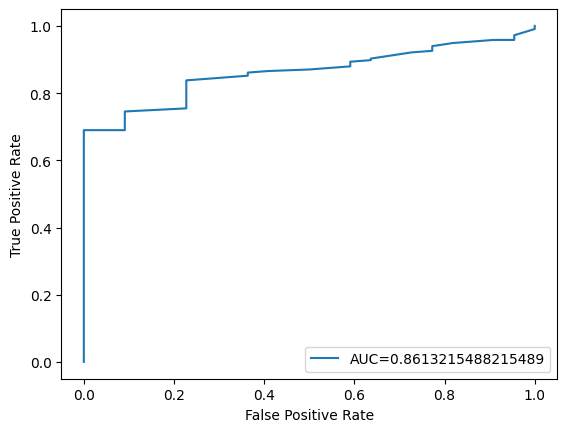

In [22]:
y_pred_proba = model.get_best_booster().predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC="+str(auc))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## feature importance

In [23]:
def generate_feature_names(
    modalities = ["caption", "image", "cross"],
    mx_dim = {"caption": 100, "image": 172, "cross": 212},
    mx_shots = 2,
    ):
    out = []
    for modality in modalities:
        dim = mx_dim[modality]
        for i_dim in range(dim):
            out.append(f"{modality}_zsl_{i_dim}")
        for shot in range(mx_shots-1):
            for i_dim in range(dim):
               out.append(f"{modality}_delta_{shot+1}_{i_dim}")
    return out

In [24]:
feature_names = generate_feature_names()
importance = pd.DataFrame({'feature': feature_names, 'importance': model.get_best_booster().feature_importance()})
types = ['zsl', 'caption','cross','image']
for t in types:
    importance[f'is_{t}']= 0
    importance.loc[importance['feature'].str.contains(t), f'is_{t}']= 1

importance.to_csv(f"{SAVE_DIR_FIN}/{col}_optuna_importance_{RS}.csv", index=False)
importance.sort_values(by="importance", ascending=False).head()

,feature,importance,is_zsl,is_caption,is_cross,is_image
13,caption_zsl_13,6,1,1,0,0
578,cross_zsl_34,4,1,0,1,0
213,image_zsl_13,4,1,0,0,1
777,cross_delta_1_21,4,0,0,1,0
838,cross_delta_1_82,3,0,0,1,0


In [25]:
# importance = pd.read_csv(f"{SAVE_DIR_FIN}/{col}_optuna_importance_{RS}.csv")
importance = importance[importance["importance"]>=1].reset_index(drop=True)
categories = ['is_zsl', 'is_caption', 'is_cross', 'is_image']
imp_grp = importance.groupby(categories)
imp_feat = imp_grp["feature"].nunique().reset_index(drop=False)
imp_sum = imp_grp["importance"].sum().reset_index(drop=False)
print(imp_feat)
print(imp_sum)
imp_feat.to_csv(f"{SAVE_DIR_FIN}/{col}_optuna_nunique_{RS}.csv", index=False)
imp_sum.to_csv(f"{SAVE_DIR_FIN}/{col}_optuna_occurrences_{RS}.csv", index=False)

   is_zsl  is_caption  is_cross  is_image  feature
0       0           0         0         1       16
1       0           0         1         0       29
2       0           1         0         0       10
3       1           0         0         1       26
4       1           0         1         0       24
5       1           1         0         0       18
   is_zsl  is_caption  is_cross  is_image  importance
0       0           0         0         1          26
1       0           0         1         0          43
2       0           1         0         0          11
3       1           0         0         1          38
4       1           0         1         0          30
5       1           1         0         0          32
